In [1]:
import matplotlib.pyplot as plt
from dataset import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2023-12-13 12:38:39.481389: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 12:38:39.483638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 12:38:39.529626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 12:38:39.532019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 12:38:40.523959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
x_train = load_x_train()
x_test = load_x_test()
y_train = load_y_train()
y_test = load_y_test()

verify_all_datasets()



x_train shape: (20000, 784)

y_train shape: (20000, 1)

x_test shape: (2000, 784)

y_test shape: (2000, 1)


In [ ]:
# A-Z dataset graph
csv_file= pd.read_csv('main_dataset/A_Z Handwritten Data.csv').astype('float32')
        
dataset = pd.DataFrame(csv_file)

x = dataset.drop('0', axis = 1)
y = dataset['0']

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

y_integer = np.intp(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.barh(alphabets, count)

plt.xlabel('Number Of Each Alphabets', fontsize = 8)
plt.ylabel('Alphabets', fontsize = 8)
plt.show()

In [3]:
# model testing

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        
        Dense(126, activation='relu'),
        Dense(64, activation='relu'),
        Dense(26, activation='softmax')
        
    ], name = "old_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

# callback = EarlyStopping(monitor='loss', patience=3) , callbacks=[callback]
history = model.fit(x_train, y_train, validation_split = 0.1, epochs=100)



2023-12-13 12:39:03.049208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 4.0836 - accuracy: 0.3489 - val_loss: 2.0457 - val_accuracy: 0.4470
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 1.8266 - accuracy: 0.5131 - val_loss: 1.6191 - val_accuracy: 0.5630
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 1.4762 - accuracy: 0.5978 - val_loss: 1.5135 - val_accuracy: 0.6325
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 1.3091 - accuracy: 0.6424 - val_loss: 1.3689 - val_accuracy: 0.6470
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 1.1305 - accuracy: 0.6763 - val_loss: 1.2622 - val_accuracy: 0.6785
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 1.0357 - accuracy: 0.6981 - val_loss: 1.1052 - val_accuracy: 0.7045
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.9139 - accuracy: 0.7301 - val_loss: 1.1006 - val_accuracy: 0.7245

In [4]:
model.evaluate(x_train, y_train), model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 1.7521 - accuracy: 0.9100


([0.21805229783058167, 0.9793000221252441],
 [1.7521121501922607, 0.9100000262260437])

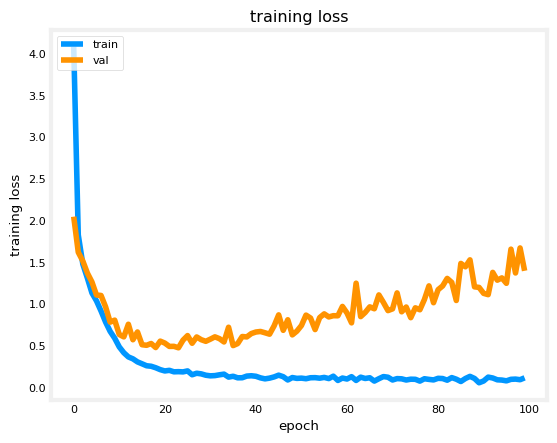

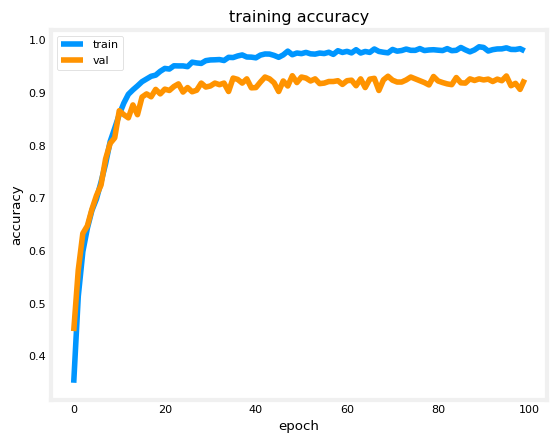

In [5]:
# print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    model = Sequential(
        [               
            tf.keras.Input(shape=(784,)),
            
            Dense(126, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(26, activation='softmax')
            
        ], name = "my_stupid_model" 
    )

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy'],
    )

    history = model.fit(x_train, y_train, validation_split = 0.1, epochs=100)
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('training loss')
    plt.ylabel('training loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('training accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()